In [141]:

from rdkit import Chem
from rdkit.Chem.Draw import rdMolDraw2D, MolDraw2DSVG
from rdkit.Chem import Draw
from IPython import display
from base64 import b64decode
import io
import PIL.Image as Image

In [121]:

mol = Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(O)=O')
patt = Chem.MolFromSmarts('OC(*)=O')

In [142]:

hit_ats = mol.GetSubstructMatches(patt)
print(hit_ats)

((3, 1, 0, 2), (11, 10, 9, 12))


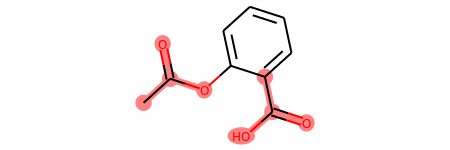

In [143]:
mol


In [144]:
bond_lists = []
for i, hit_at in enumerate(hit_ats):
    hit_at = list(hit_at)
    bond_list = []
    for bond in patt.GetBonds():
        a1 = hit_at[bond.GetBeginAtomIdx()]
        a2 = hit_at[bond.GetEndAtomIdx()]
        bond_list.append(mol.GetBondBetweenAtoms(a1, a2).GetIdx())
    bond_lists.append(bond_list)
print(bond_lists)

[[2, 0, 1], [10, 9, 11]]


In [125]:
hit_ats

((3, 1, 0, 2), (11, 10, 9, 12))

In [126]:
bond_lists

[[2, 0, 1], [10, 9, 11]]

In [135]:
colours = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]
atom_cols = {}
bond_cols = {}
atom_list = []
bond_list = []
for i, (hit_atom, hit_bond) in enumerate(zip(hit_ats, bond_lists)):
    hit_atom = list(hit_atom)
    for at in hit_atom:
        atom_cols[at] = colours[i%3]
        atom_list.append(at)
    for bd in hit_bond:
        bond_cols[bd] = colours[i%3]
        bond_list.append(bd)
atom_cols

{3: (1, 0, 0),
 1: (1, 0, 0),
 0: (1, 0, 0),
 2: (1, 0, 0),
 11: (0, 1, 0),
 10: (0, 1, 0),
 9: (0, 1, 0),
 12: (0, 1, 0)}

In [136]:
atom_list

[3, 1, 0, 2, 11, 10, 9, 12]

In [138]:
bond_list

[2, 0, 1, 10, 9, 11]

In [139]:
d = rdMolDraw2D.MolDraw2DSVG(300, 300)
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=atom_list,
                                   highlightAtomColors=atom_cols,
                                   highlightBonds=bond_list, #highlightAtomRadii = {0:0.5, 1: 0.2},
                                   highlightBondColors=bond_cols
                                  )

d.FinishDrawing()
# svg = d.GetDrawingText()
# with open('./asprin_kekule.svg', 'w') as f:
#     f.write(svg)

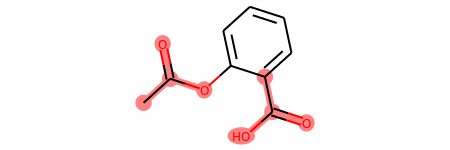

In [140]:
mol

In [99]:
type(d)

rdkit.Chem.Draw.rdMolDraw2D.MolDraw2DCairo

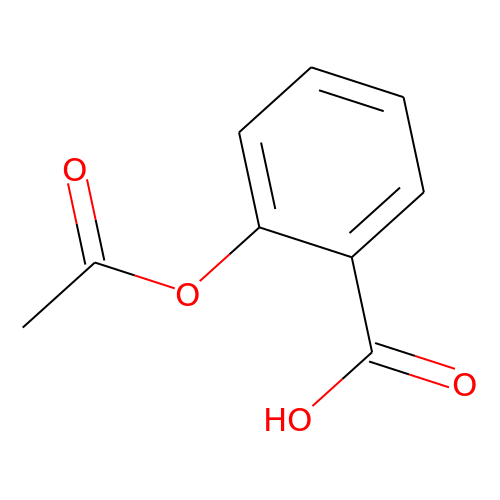

In [86]:

display.Image(bimg)

In [92]:



image = Image.open(io.BytesIO(bimg))


In [ ]:
plt.savefig('./asprin_digit.svg')

In [98]:
image.save('./asprin_kekule.png',)

In [96]:
type(image)

PIL.PngImagePlugin.PngImageFile

In [ ]:
plt.savefig('./asprin_digit.svg')